In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, time
import holidays
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
d=pd.read_csv('/content/drive/Shared drives/Analytics Vidhya E-Commerce Hackathon/train_8wry4cB.csv', low_memory=False)

In [0]:
df = d.copy(deep=True)

In [6]:
df.head()

,session_id,startTime,endTime,ProductList,gender
0,u16159,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female
1,u10253,16/12/14 14:35,16/12/14 14:41,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male
2,u19037,01/12/14 15:58,01/12/14 15:58,A00002/B00001/C00020/D16944/,female
3,u14556,23/11/14 2:57,23/11/14 3:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female
4,u24295,17/12/14 16:44,17/12/14 16:46,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male


In [7]:
df.shape

(10500, 5)

In [8]:
df.dtypes

session_id     object
startTime      object
endTime        object
ProductList    object
gender         object
dtype: object

In [0]:
df['startTime'] = pd.to_datetime(df.startTime, format='%d/%m/%y %H:%M')
df['endTime'] = pd.to_datetime(df.endTime, format='%d/%m/%y %H:%M')
df['starthour'] = pd.to_datetime(df['startTime']).dt.hour

In [10]:
df.head()

,session_id,startTime,endTime,ProductList,gender,starthour
0,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female,18
1,u10253,2014-12-16 14:35:00,2014-12-16 14:41:00,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male,14
2,u19037,2014-12-01 15:58:00,2014-12-01 15:58:00,A00002/B00001/C00020/D16944/,female,15
3,u14556,2014-11-23 02:57:00,2014-11-23 03:00:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female,2
4,u24295,2014-12-17 16:44:00,2014-12-17 16:46:00,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male,16


In [0]:
df['dayofweek'] = pd.to_datetime(df['startTime']).apply(lambda x: x.strftime('%A'))

Text(0.5, 1.0, 'Male and Female Session Start')

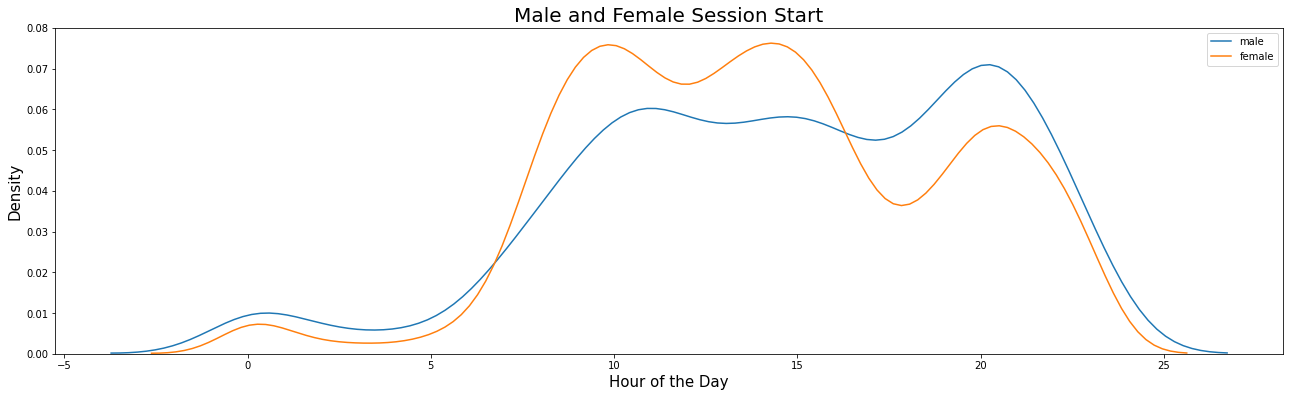

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
fig = plt.figure(figsize=(22,6))
sns.kdeplot(df.loc[df['gender'] == 'male', 'starthour'], label = 'male')
sns.kdeplot(df.loc[df['gender'] == 'female', 'starthour'], label = 'female');
plt.xlabel('Hour of the Day',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title('Male and Female Session Start',fontsize=20)

In [13]:
df['time_diff'] = df['endTime']-df['startTime']
df['time_diff'] = df['time_diff']/np.timedelta64(1,'m')
df.head()

,session_id,startTime,endTime,ProductList,gender,starthour,dayofweek,time_diff
0,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female,18,Monday,1.0
1,u10253,2014-12-16 14:35:00,2014-12-16 14:41:00,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male,14,Tuesday,6.0
2,u19037,2014-12-01 15:58:00,2014-12-01 15:58:00,A00002/B00001/C00020/D16944/,female,15,Monday,0.0
3,u14556,2014-11-23 02:57:00,2014-11-23 03:00:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female,2,Sunday,3.0
4,u24295,2014-12-17 16:44:00,2014-12-17 16:46:00,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male,16,Wednesday,2.0


In [14]:
from scipy import stats
z = np.abs(stats.zscore(df['time_diff']))
threshold = 3
print(np.where(z > 3))

df = df[(z < 3)]

(array([   62,    70,   256,   363,   537,   773,   957,  1370,  1541,
        1560,  2015,  2441,  2455,  2519,  2549,  2829,  3088,  3194,
        3251,  3284,  3662,  3789,  4086,  4242,  4393,  4645,  4701,
        4727,  5090,  5251,  5563,  5607,  5733,  6071,  6103,  6234,
        6348,  6920,  6969,  7065,  7257,  7362,  7402,  7492,  7979,
        8023,  8048,  8286,  8341,  8875,  9006,  9012,  9297,  9418,
        9643,  9777,  9978, 10022, 10026, 10140]),)


In [0]:
df=df.reset_index(drop=True)

In [16]:
df['gender'].value_counts()

female    8152
male      2288
Name: gender, dtype: int64

In [17]:
print(df.loc[df.gender == 'male','time_diff'].mean())
print(df.loc[df.gender == 'female','time_diff'].mean())

9.872814685314685
9.377330716388617


In [0]:
filter = (df['starthour'] >=0)&((df['starthour'] <=6))
df.loc[filter, 'timeofday'] = 'early'

filter = (df['starthour'] > 6) & (df['starthour'] <= 16)
df.loc[filter, 'timeofday'] = 'midday'

filter = (df['starthour'] > 16) 
df.loc[filter, 'timeofday'] = 'late'

In [19]:
df.ProductList[0]

'A00002/B00003/C00006/D28435/;A00002/B00003/C00006/D02554/;A00002/B00003/C00006/D28436/;A00002/B00003/C00006/D28437/'

In [0]:
product_list=[]
for i in range(len(df.ProductList)):
  product_list.append(df.ProductList[i].split(';'))

In [21]:
product_list[0:5]

[['A00002/B00003/C00006/D28435/',
  'A00002/B00003/C00006/D02554/',
  'A00002/B00003/C00006/D28436/',
  'A00002/B00003/C00006/D28437/'],
 ['A00001/B00009/C00031/D29404/',
  'A00001/B00009/C00031/D02617/',
  'A00001/B00009/C00031/D29407/',
  'A00001/B00009/C00031/D29410/',
  'A00001/B00009/C00031/D29411/',
  'A00001/B00009/C00031/D25444/',
  'A00001/B00009/C00031/D29418/'],
 ['A00002/B00001/C00020/D16944/'],
 ['A00002/B00004/C00018/D10284/',
  'A00002/B00004/C00018/D10285/',
  'A00002/B00004/C00018/D10286/'],
 ['A00001/B00001/C00012/D30805/', 'A00001/B00001/C00012/D30806/']]

In [0]:
product_categories = []
product_sub_cats = []
product_sub_sub_cats = []
product_codes = []

products_viewed=[]
prod_cats_viewed=[]
prod_sub_cats_viewed=[]
prod_sub_sub_cats_viewed=[]
for i in range(len(product_list)):
  prod_cat=[]
  prod_sub_cat=[]
  prod_sub_sub_cat=[]
  prod=[]
  for j in range(len(product_list[i])):
    product_list[i][j]=product_list[i][j].split('/')
    prod_cat.append(product_list[i][j][0])
    prod_sub_cat.append(product_list[i][j][1])
    prod_sub_sub_cat.append(product_list[i][j][2])
    prod.append(product_list[i][j][3])

    product_categories.append(product_list[i][j][0])
    product_sub_cats.append(product_list[i][j][1])
    product_sub_sub_cats.append(product_list[i][j][2])
    product_codes.append(product_list[i][j][3])

  products_viewed.append(len(set(prod)))
  prod_cats_viewed.append(len(set(prod_cat)))
  prod_sub_cats_viewed.append(len(set(prod_sub_cat)))
  prod_sub_sub_cats_viewed.append(len(set(prod_sub_sub_cat)))
  
  product_categories.append(product_list[i][j][0])
  product_sub_cats.append(product_list[i][j][1])
  product_sub_sub_cats.append(product_list[i][j][2])
  product_codes.append(product_list[i][j][3])


In [0]:
temp=pd.DataFrame([prod_cats_viewed,prod_sub_cats_viewed,prod_sub_sub_cats_viewed,products_viewed]).transpose()
temp.columns=['prod_cats_viewed','prod_sub_cats_viewed','prod_sub_sub_cats_viewed','products_viewed']
df=pd.concat([df,temp],axis=1)
del temp

In [0]:
#prod_cat_vars = [f'prod_cat_{i}' for i in range(1,12)]
prod_cat_vars = [f'{i}' for i in set(product_categories)]

In [0]:
for i in prod_cat_vars:
  df[i]=0

In [0]:
for i in range(df.shape[0]):
  for j in range(len(product_list[i])):
    df.loc[i,product_list[i][j][0]] += 1

In [0]:
X = df.drop(['session_id','startTime','endTime','ProductList','starthour','gender'],axis=1)
Y = (df.gender=='female')*1

In [0]:
X = pd.get_dummies(X, columns=['dayofweek','timeofday'], drop_first=True)

In [0]:
for i in X.columns:
  if ((X[i]==0)*1).sum()>=0.99*X.shape[0]:
    X.drop(i,axis=1,inplace=True)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state= 25)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(8352, 19) (2088, 19)
(8352,) (2088,)


In [31]:
print(y_train.mean(),y_test.mean())

0.780411877394636 0.7825670498084292


In [0]:
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [0]:
# Baseline GBM model with default parameter values
gbm = GradientBoostingClassifier(random_state=10)
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)
y_probs = gbm.predict_proba(X_test)

Mean AUC score: 0.8167
Test set accuracy score: 0.875
Test set AUC score: 0.7799


Text(0, 0.5, 'Feature Importance Score')

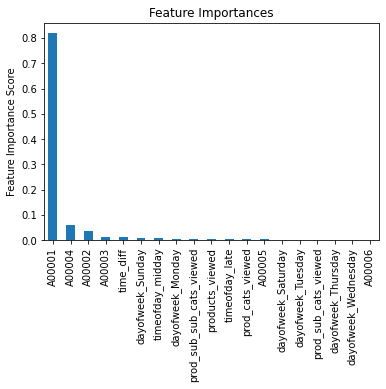

In [51]:
#cv_score = cross_val_score(gbm, X_train, y_train, cv=5, scoring='accuracy')
cv_score = cross_val_score(gbm, X_train, y_train, cv=5, scoring='roc_auc')
accuracy = accuracy_score(y_test, y_pred)
AUC = roc_auc_score(y_test, y_pred)
print(f'Mean AUC score: {cv_score.mean():.4}')
print(f'Test set accuracy score: {accuracy:.3}')
print(f'Test set AUC score: {AUC:.4}')
predictors=X_train.columns
feat_imp = pd.Series(gbm.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

# Tuning GBM model

In [39]:
#Step-1: determining optimum number of trees for the default learning rate of 0.1
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=100,min_samples_leaf=20,max_depth=5,max_features='sqrt',subsample=0.8,random_state=10),
                        param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,y_train)
print(gsearch1.best_params_, gsearch1.best_score_)
scores = pd.DataFrame(gsearch1.cv_results_['params'])
scores['test_score']=gsearch1.cv_results_["mean_test_score"]
scores

{'n_estimators': 50} 0.8175334716861835


,n_estimators,test_score
0,20,0.815603
1,30,0.816308
2,40,0.816516
3,50,0.817533
4,60,0.816242
5,70,0.816086
6,80,0.815721


In [41]:
#Step-2: determining optimum values for max_depth & min_samples_split
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(50,551,100)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, max_features='sqrt', subsample=0.8,random_state=10),
                        param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train,y_train)
print(gsearch2.best_params_, gsearch2.best_score_)
scores = pd.DataFrame(gsearch2.cv_results_['params'])
scores['test_score']=gsearch2.cv_results_["mean_test_score"]
scores

{'max_depth': 5, 'min_samples_split': 150} 0.8184581694109487


,max_depth,min_samples_split,test_score
0,5,50,0.817907
1,5,150,0.818458
2,5,250,0.817915
3,5,350,0.818434
4,5,450,0.817646
5,5,550,0.815157
6,7,50,0.815436
7,7,150,0.816389
8,7,250,0.817061
9,7,350,0.817022


{'min_samples_leaf': 30} 0.8186449484052046


Text(0, 0.5, 'Feature Importance Score')

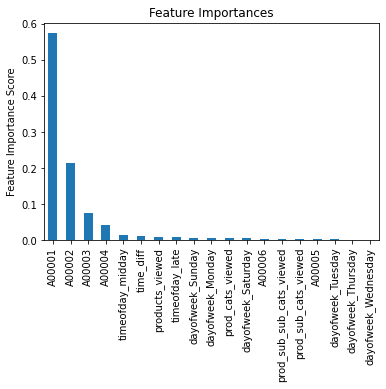

In [58]:
#Step-3: determining optimum value for min_samples_leaf
param_test3 = {'min_samples_leaf':range(10,101,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, max_depth=5, min_samples_split=150, max_features='sqrt', subsample=0.8,random_state=10),
                        param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,y_train)
print(gsearch3.best_params_, gsearch3.best_score_)
scores = pd.DataFrame(gsearch3.cv_results_['params'])
scores['test_score']=gsearch3.cv_results_["mean_test_score"]
scores

# we will observe that we derive value from more variables than before
optimized_model = gsearch3.best_estimator_.fit(X_train,y_train)
predictors=X_train.columns
feat_imp = pd.Series(optimized_model.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [60]:
#Step-4: determining optimum value for max_features
param_test4 = {'max_features':range(2,7,1)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, max_depth=5, min_samples_split=150, min_samples_leaf=30, subsample=0.8,random_state=10),
                        param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train,y_train)
print(gsearch4.best_params_, gsearch4.best_score_)
scores = pd.DataFrame(gsearch4.cv_results_['params'])
scores['test_score']=gsearch4.cv_results_["mean_test_score"]
scores

{'max_features': 4} 0.8186449484052046


,max_features,test_score
0,2,0.817789
1,3,0.818028
2,4,0.818645
3,5,0.816867
4,6,0.818039


In [61]:
#Step-5: determining optimum value for subsample
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, max_depth=5, min_samples_split=150, min_samples_leaf=30, max_features=4,random_state=10),
                        param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(X_train,y_train)
print(gsearch5.best_params_, gsearch5.best_score_)
scores = pd.DataFrame(gsearch5.cv_results_['params'])
scores['test_score']=gsearch5.cv_results_["mean_test_score"]
scores

{'subsample': 0.85} 0.8190154323330191


,subsample,test_score
0,0.60,0.816765
1,0.70,0.817573
2,0.75,0.817693
3,0.80,0.818645
4,0.85,0.819015
5,0.90,0.818062


Mean AUC score: 0.8188
Test set accuracy score: 0.876
Test set AUC score: 0.7795


Text(0, 0.5, 'Feature Importance Score')

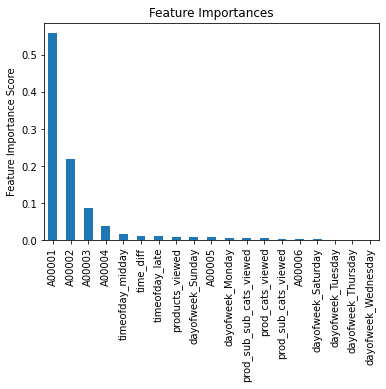

In [63]:
#Step-6: reduce the learning rate and increase the number of trees proportionally. Do this to an extent where the model is not too computationally expensive
gbm_tuned = GradientBoostingClassifier(learning_rate=0.01, n_estimators=500, max_depth=5, min_samples_split=150, min_samples_leaf=30, subsample=0.85, max_features= 4,random_state=10,warm_start=True)
gbm_tuned.fit(X_train,y_train)

y_pred = gbm_tuned.predict(X_test)
y_probs = gbm_tuned.predict_proba(X_test)
cv_score = cross_val_score(gbm_tuned, X_train, y_train, cv=5, scoring='roc_auc')
accuracy = accuracy_score(y_test, y_pred)
AUC = roc_auc_score(y_test, y_pred)
print(f'Mean AUC score: {cv_score.mean():.4}')
print(f'Test set accuracy score: {accuracy:.3}')
print(f'Test set AUC score: {AUC:.4}')
predictors=X_train.columns
feat_imp = pd.Series(gbm_tuned.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [0]:
submission=pd.read_csv('/content/drive/Shared drives/Analytics Vidhya E-Commerce Hackathon/test_Yix80N0.csv', low_memory=False)
submission['startTime'] = pd.to_datetime(submission.startTime, format='%d/%m/%y %H:%M')
submission['endTime'] = pd.to_datetime(submission.endTime, format='%d/%m/%y %H:%M')
submission['starthour'] = pd.to_datetime(submission['startTime']).dt.hour
submission['dayofweek'] = pd.to_datetime(submission['startTime']).apply(lambda x: x.strftime('%A'))
submission['time_diff'] = submission['endTime']-submission['startTime']
submission['time_diff'] = submission['time_diff']/np.timedelta64(1,'m')

filter = (submission['starthour'] >=0)&((submission['starthour'] <=6))
submission.loc[filter, 'timeofday'] = 'early'
filter = (submission['starthour'] > 6) & (submission['starthour'] <= 16)
submission.loc[filter, 'timeofday'] = 'midday'
filter = (submission['starthour'] > 16) 
submission.loc[filter, 'timeofday'] = 'late'

submission_product_list=[]
for i in range(len(submission.ProductList)):
  submission_product_list.append(submission.ProductList[i].split(';'))

submission_products_viewed=[]
submission_prod_cats_viewed=[]
submission_prod_sub_cats_viewed=[]
submission_prod_sub_sub_cats_viewed=[]

for i in range(len(submission_product_list)):
  prod_cat=[]
  prod_sub_cat=[]
  prod_sub_sub_cat=[]
  prod=[]
  for j in range(len(submission_product_list[i])):
    submission_product_list[i][j]=submission_product_list[i][j].split('/')
    prod_cat.append(submission_product_list[i][j][0])
    prod_sub_cat.append(submission_product_list[i][j][1])
    prod_sub_sub_cat.append(submission_product_list[i][j][2])
    prod.append(submission_product_list[i][j][3])
  submission_products_viewed.append(len(set(prod)))
  submission_prod_cats_viewed.append(len(set(prod_cat)))
  submission_prod_sub_cats_viewed.append(len(set(prod_sub_cat)))
  submission_prod_sub_sub_cats_viewed.append(len(set(prod_sub_sub_cat)))

temp=pd.DataFrame([submission_prod_cats_viewed,submission_prod_sub_cats_viewed,submission_prod_sub_sub_cats_viewed,submission_products_viewed]).transpose()
temp.columns=['prod_cats_viewed','prod_sub_cats_viewed','prod_sub_sub_cats_viewed','products_viewed']
submission=pd.concat([submission,temp],axis=1)
del temp

for i in prod_cat_vars:
  submission[i]=0

for i in range(submission.shape[0]):
  for j in range(len(submission_product_list[i])):
    if submission_product_list[i][j][0] in prod_cat_vars:
      submission.loc[i,submission_product_list[i][j][0]] += 1

submission_score = pd.DataFrame(submission['session_id'])
submission = pd.get_dummies(submission, columns=['dayofweek','timeofday'], drop_first=True)
submission = submission.loc[:,X.columns]

missing_cols = [col for col in X.columns if col not in submission.columns]
missing_cols

for i in missing_cols:
  submission[i]=0

In [45]:
submission_pred = gbm.predict(submission)
print(submission_pred.mean())
submission_score['gender']='male'
submission_score.loc[submission_pred==1,'gender']='female'
print(submission_score.groupby('gender')['session_id'].count())
submission_score.to_csv(r'/content/drive/Shared drives/Analytics Vidhya E-Commerce Hackathon/submission_gbm_final.csv',index=False)

0.8411111111111111
gender
female    3785
male       715
Name: session_id, dtype: int64
